<a href="https://colab.research.google.com/github/FatimaShenno/NLP_Projects/blob/main/Final_Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tf


import nltk
import re
import string

import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [ ]:
train_data = pd.read_csv('/content/Train.csv')
valid_data =  pd.read_csv('/content/Valid.csv')
test_data = pd.read_csv('/content/Test.csv')

In [ ]:
train_data.head(5)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
valid_data.head(5)

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


**Exploring the Data**

In [ ]:
train_data.shape

(40000, 2)

In [ ]:
valid_data.shape

(5000, 2)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
train_data.describe(include="object")

,text
count,40000
unique,39723
top,"Hilarious, clean, light-hearted, and quote-wor..."
freq,4


In [ ]:
# from wordcloud import WordCloud

# plt.subplots(figsize=(25,15))
# wordcloud = WordCloud(background_color='Black',
#                       width=1920,
#                       height=1080
#                      ).generate(" ".join(data['text']))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [ ]:
train_data.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

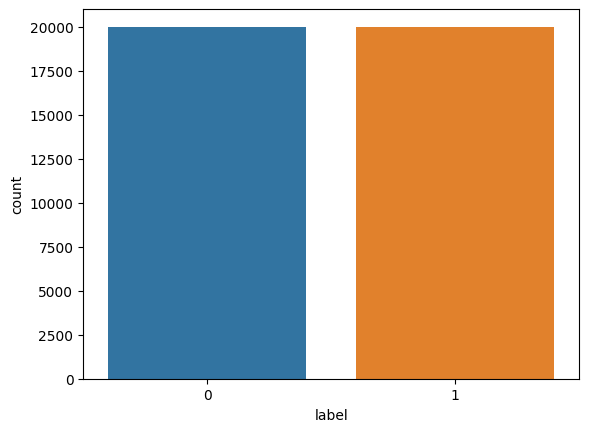

In [ ]:
sns.countplot(x='label',data = train_data)
plt.show()

In [ ]:
train_data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
valid_data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# df = train_data.copy()

In [ ]:
X_train = train_data.text
print(X_train)

0        I grew up (b. 1965) watching and loving the Th...
1        When I put this movie in my DVD player, and sa...
2        Why do people who do not know what a particula...
3        Even though I have great interest in Biblical ...
4        Im a die hard Dads Army fan and nothing will e...
                               ...                        
39995    "Western Union" is something of a forgotten cl...
39996    This movie is an incredible piece of work. It ...
39997    My wife and I watched this movie because we pl...
39998    When I first watched Flatliners, I was amazed....
39999    Why would this film be so good, but only gross...
Name: text, Length: 40000, dtype: object


In [ ]:
Y_train = train_data.label
print(Y_train)

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64


In [ ]:
X_valid = valid_data.text
print(X_valid)

0       It's been about 14 years since Sharon Stone aw...
1       someone needed to make a car payment... this i...
2       The Guidelines state that a comment must conta...
3       This movie is a muddled mish-mash of clichés f...
4       Before Stan Laurel became the smaller half of ...
                              ...                        
4995    Man, I loved this movie! This really takes me ...
4996    Recovery is an incredibly moving piece of work...
4997    You can take the crook out of the joint, but i...
4998    FUTZ is the only show preserved from the exper...
4999    "The Mother" tells of a recently widowed mid-6...
Name: text, Length: 5000, dtype: object


In [ ]:
Y_valid = valid_data.label
print(Y_valid)

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label, Length: 5000, dtype: int64


In [ ]:
Y_train=tf.reshape(Y_train,(-1,1))
Y_valid=tf.reshape(Y_valid,(-1,1))

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
sw_nltk.remove('not')

In [ ]:
import re

def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data


from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
sw_nltk.remove('not')

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in sw_nltk])

def stemming(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
# train_data['text']=train_data['text'].apply(lambda x: remove_punctuations(x).lower())
# train_data['text']=train_data['text'].apply(lambda x: remove_html(x))
# train_data['text']=train_data['text'].apply(lambda x: remove_url(x))
# train_data['text']=train_data['text'].apply(lambda x: remove_stopwords(x))
# ps = nltk.PorterStemmer()
# train_data['text']=train_data['text'].apply(lambda x: stemming(x))

In [ ]:
X_train=X_train.apply(lambda x: remove_punctuations(x).lower())
X_train=X_train.apply(lambda x: remove_html(x))
X_train=X_train.apply(lambda x: remove_url(x))
X_train=X_train.apply(lambda x: remove_stopwords(x))
ps = nltk.PorterStemmer()
X_train=X_train.apply(lambda x: stemming(x))

In [ ]:
X_valid=X_valid.apply(lambda x: remove_punctuations(x).lower())
X_valid=X_valid.apply(lambda x: remove_html(x))
X_valid=X_valid.apply(lambda x: remove_url(x))
X_valid=X_valid.apply(lambda x: remove_stopwords(x))
ps = nltk.PorterStemmer()
X_valid=X_valid.apply(lambda x: stemming(x))

In [ ]:
X_train.head(5)

0    grew b 1965 watch love thunderbird mate school...
1    put movi dvd player sat coke chip expect hope ...
2    peopl not know particular time past like feel ...
3    even though great interest biblic movi bore de...
4    im die hard dad armi fan noth ever chang got t...
Name: text, dtype: object

In [ ]:
X_valid.head(5)

0    14 year sinc sharon stone award viewer legcros...
1    someon need make car payment truli aw make jea...
2    guidelin state comment must contain minimum fo...
3    movi muddl mishmash cliché recent cinema promi...
4    stan laurel becam smaller half alltim greatest...
Name: text, dtype: object

**PreProcessing**

* Tokenize

In [ ]:
max_words = 100000
# max_len = 100

# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(X_train)
# sequences = tok.texts_to_sequences(X_train)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


from keras.utils import pad_sequences
from keras.preprocessing import text

token = text.Tokenizer(num_words=max_words)
max_len = 1500

token.fit_on_texts(list(X_train) + list(X_valid))
xtrain_seq = token.texts_to_sequences(X_train)
xvalid_seq = token.texts_to_sequences(X_valid)

xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)

xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

#word_index = token.word_index

In [ ]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[max_len]))
model.add(tf.keras.layers.Embedding(max_words,128,input_length=max_len))    

model.add(tf.keras.layers.LSTM(200, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(200,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(200))
model.add(tf.keras.layers.Dropout(0.5))
          
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 128)         12800000  
                                                                 
 lstm (LSTM)                 (None, 1500, 200)         263200    
                                                                 
 dropout (Dropout)           (None, 1500, 200)         0         
                                                                 
 lstm_1 (LSTM)               (None, 1500, 200)         320800    
                                                                 
 dropout_1 (Dropout)         (None, 1500, 200)         0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
hist =model.fit(xtrain_pad,Y_train,batch_size=64,epochs=10)

Epoch 1/10
625/625 [==============================] - 283s 437ms/step - loss: 0.3821 - acc: 0.8380
Epoch 2/10
625/625 [==============================] - 220s 352ms/step - loss: 0.1730 - acc: 0.9373
Epoch 3/10
625/625 [==============================] - 203s 324ms/step - loss: 0.0923 - acc: 0.9693
Epoch 4/10
625/625 [==============================] - 197s 315ms/step - loss: 0.0607 - acc: 0.9797
Epoch 5/10
625/625 [==============================] - 194s 311ms/step - loss: 0.0434 - acc: 0.9858
Epoch 6/10
625/625 [==============================] - 189s 302ms/step - loss: 0.0282 - acc: 0.9913
Epoch 7/10
625/625 [==============================] - 186s 298ms/step - loss: 0.0243 - acc: 0.9921
Epoch 8/10
625/625 [==============================] - 187s 299ms/step - loss: 0.0236 - acc: 0.9927
Epoch 9/10
625/625 [==============================] - 188s 300ms/step - loss: 0.0153 - acc: 0.9954
Epoch 10/10
625/625 [==============================] - 188s 300ms/step - loss: 0.0168 - acc: 0.9946


In [ ]:
model.evaluate(xtrain_pad,Y_train)

1250/1250 [==============================] - 101s 79ms/step - loss: 0.0073 - acc: 0.9980


[0.00728685362264514, 0.99795001745224]

Valid data

In [ ]:
hist_valid =model.fit(xvalid_pad,Y_valid,batch_size=64,epochs=10)

Epoch 1/10
79/79 [==============================] - 26s 293ms/step - loss: 0.3328 - acc: 0.8720
Epoch 2/10
79/79 [==============================] - 24s 305ms/step - loss: 0.1584 - acc: 0.9544
Epoch 3/10
79/79 [==============================] - 24s 307ms/step - loss: 0.0709 - acc: 0.9828
Epoch 4/10
79/79 [==============================] - 24s 301ms/step - loss: 0.0333 - acc: 0.9922
Epoch 5/10
79/79 [==============================] - 24s 308ms/step - loss: 0.0090 - acc: 0.9974
Epoch 6/10
79/79 [==============================] - 25s 313ms/step - loss: 0.0043 - acc: 0.9988
Epoch 7/10
79/79 [==============================] - 24s 310ms/step - loss: 7.6229e-04 - acc: 1.0000
Epoch 8/10
79/79 [==============================] - 24s 307ms/step - loss: 1.3440e-04 - acc: 1.0000
Epoch 9/10
79/79 [==============================] - 25s 312ms/step - loss: 7.0193e-05 - acc: 1.0000
Epoch 10/10
79/79 [==============================] - 24s 310ms/step - loss: 5.3234e-05 - acc: 1.0000


In [ ]:
model.evaluate(xvalid_pad,Y_valid)

157/157 [==============================] - 13s 80ms/step - loss: 1.1101e-05 - acc: 1.0000


[1.1101114978373516e-05, 1.0]

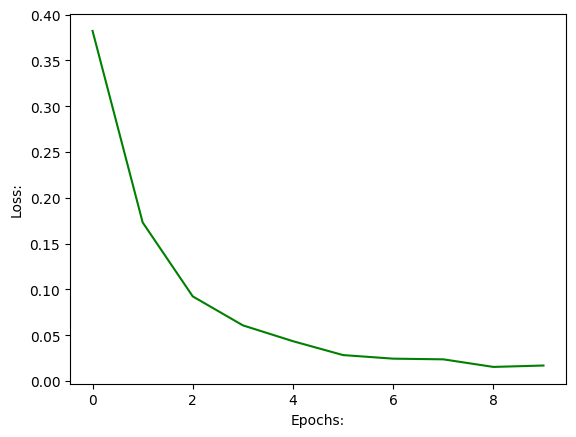

In [ ]:
plt.plot(hist.history['loss'],'g')
plt.xlabel('Epochs:')
plt.ylabel('Loss:')
plt.show()

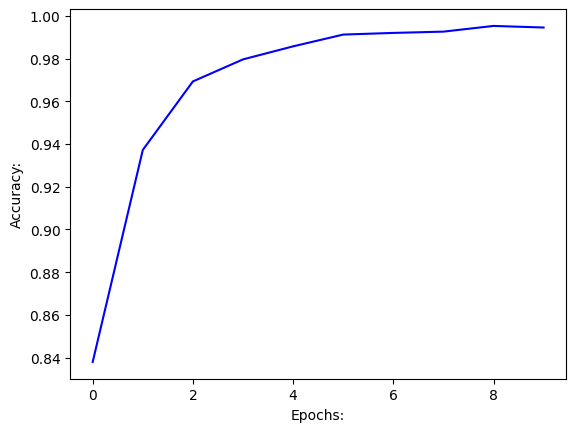

In [ ]:
plt.plot(hist.history['acc'],'b')
plt.xlabel('Epochs:')
plt.ylabel('Accuracy:')
plt.show()

valid data

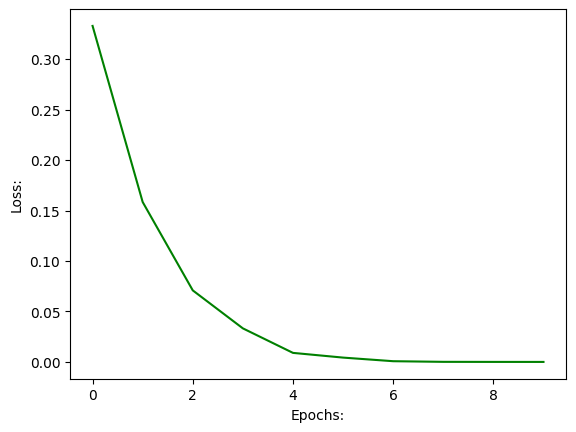

In [ ]:
plt.plot(hist_valid.history['loss'],'g')
plt.xlabel('Epochs:')
plt.ylabel('Loss:')
plt.show()

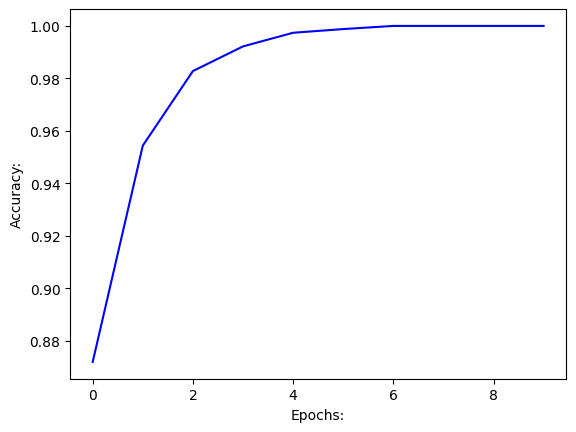

In [ ]:
plt.plot(hist_valid.history['acc'],'b')
plt.xlabel('Epochs:')
plt.ylabel('Accuracy:')
plt.show()

Test data

In [ ]:
X_test= test_data.text

In [ ]:
X_test=X_test.apply(lambda x: remove_punctuations(x).lower())
X_test=X_test.apply(lambda x: remove_html(x))
X_test=X_test.apply(lambda x: remove_url(x))
X_test=X_test.apply(lambda x: remove_stopwords(x))
ps = nltk.PorterStemmer()
X_test=X_test.apply(lambda x: stemming(x))

In [ ]:
tok = text.Tokenizer(num_words=max_words)
tok.fit_on_texts(X_test)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
pred=model.predict(sequences_matrix_test)

157/157 [==============================] - 13s 77ms/step


In [ ]:
pred=(pred>0.5)*1

In [ ]:
submission= pd.read_csv('/content/sample_submission.csv')
submission=pd.DataFrame()
submission['id']=test_data['id']
submission['label']=pred

In [ ]:
submission.head(10)

,id,label
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [ ]:
submission.to_csv('sample_submission4.csv',index=False)